# Учебный проект на тему "Предсказание цен на автомобили"

# Введение

Китайская автомобильная компания Geely Auto стремится выйти на рынок США, открыв там свое производственное подразделение и производя автомобили на местном уровне, чтобы составить конкуренцию своим американским и европейским аналогам.

Они заключили контракт с автомобильной консалтинговой компанией, чтобы понять факторы, от которых зависит цена на автомобили. В частности, они хотят понять факторы, влияющие на цены на автомобили на американском рынке, поскольку они могут сильно отличаться от цен на китайском рынке. Компания хочет знать:

* Какие переменные важны для прогнозирования цены автомобиля
* Насколько хорошо эти переменные описывают цену автомобиля

На основе различных исследований рынка консалтинговая фирма собрала большой набор данных о различных типах автомобилей на американском рынке.

Итак, пристегните ремень безопасности и приготовьтесь к увлекательному путешествию. Нам предстоит исследовать мир автомобилей, разгадывать загадки и посмеяться по пути!

# Структура датасета

* **CarID**: идентификационный номер для каждого автомобиля
* **SafetyRating**: рейтинг безопасности автомобиля.
* **CarName**: название модели автомобиля.
* **FuelType**: тип используемого топлива (бензин, дизельное топливо, электричество и т. д.).
* **Aspiration**: Тип аспирации (стандартный или с турбонаддувом)
* **NumDoors**: количество дверей в машине.
* **BodyStyle**: Стиль кузова автомобиля (седан, купе, внедорожник и т. д.).
* **DriveWheelType**: Тип ведущих колес (передние, задние, все)
* **EngineLocation**: расположение двигателя автомобиля (спереди или сзади).
* **Wheelbase**: длина колесной базы автомобиля.
* **CarLength**: Общая длина автомобиля.
* **CarWidth**: Ширина автомобиля.
* **CarHeight**: Высота автомобиля.
* **CurbWeight**: вес автомобиля без пассажиров и груза.
* **EngineType**: Тип двигателя (газовый, дизельный, электрический и т. д.).
* **NumCylinders**: количество цилиндров в двигателе.
* **EngineSize**: размер двигателя автомобиля.
* **FuelSystem**: Тип системы подачи топлива
* **BoreRatio**: соотношение диаметра цилиндра к ходу двигателя.
* **Stroke**: Длина хода двигателя
* **CompressionRatio**: Степень сжатия двигателя.
* **Horsepower**: Мощность двигателя автомобиля
* **PeakRPM**: Пиковые обороты двигателя (оборотов в минуту).
* **CityMPG**: Мили на галлон (MPG) при вождении в городе
* **HighwayMPG**: MPG на шоссе
* **CarPrice**: Цена автомобиля

# Жизненный цикл проекта машинного обучения

* Понимание постановки задачи
* Проверки данных для выполнения
* Исследовательский анализ данных
* Предварительная обработка данных
* Обучение моделей
* Выбор лучшей модели

## 1. Постановка задачи

Прогнозирование цен на автомобили на основе широкого спектра характеристик. Используя набор данных, содержащий такие сведения об автомобиле, как рейтинги безопасности, размеры, характеристики двигателя и многое другое, мы стремимся разработать модель машинного обучения, которая точно оценивает цену различных моделей автомобилей.

## 2 Импорт необходимых библиотек

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## 3. Проверки данных для выполнения

* Проверить наличие отсутствующих значений
* Проверить наличие дубликатов
* Проверить тип данных
* Проверить количество уникальных значений каждого столбца
* Проверить статистику набора данных
* Проверить различные категории, представленные в разных категориальных столбцах

In [4]:
# Проверка наличия отсутствующих значений
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Видим, пропущенных значений не имеется.

In [5]:
# Проверка наличия дубликатов
df.duplicated().sum()

0

Видим, дубликатов не имеется.

In [6]:
# Проверка типов данных
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
# Проверка на количество уникальных значений каждого столбца
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [8]:
# Проверка статистики датасета
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Выводы из статистики:
* 1. **Разнообразие автомобилей**:
   * Датасет охватывает 205 моделей автомобилей, каждая из которых уникальна по своим характеристикам;
   * Размеры, вес и мощность двигателя различаются в зависимости от автомобиля.
* 2. **Диапазон цен**:
   * Минимальная цена `$`5118;
   * Максимальная цена `$`45400;
   * Средняя цена автомобиля составляет около `$`13276.
* 3. **Разнообразие двигателей**:
   * Двигатели различаются диаметром отверстия (boreratio) и длиной хода (stroke);
   * Рейтинги риска (symboling) варьируются от -2 до 3.
* 4. **Распределение данных**:
   * Такие характреристики, как ширина автомобиля, снаряженная масса, объём двигателя, демонстрируют заметную изменчивость;
   * Потенциальные выбросы присутствуют в степени сжатия и мощности.

In [9]:
# Выписываем все категориальные переменные
categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
    'cylindernumber',
    'fuelsystem'
]

for col in categorical_columns:
    
    print(f"Category in {col} is : {df[col].unique()}")

Category in fueltype is : ['gas' 'diesel']
Category in aspiration is : ['std' 'turbo']
Category in doornumber is : ['two' 'four']
Category in carbody is : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Category in drivewheel is : ['rwd' 'fwd' '4wd']
Category in enginelocation is : ['front' 'rear']
Category in enginetype is : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Category in cylindernumber is : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Category in fuelsystem is : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


## 4.Исследовательский анализ данных (EDA-анализ)

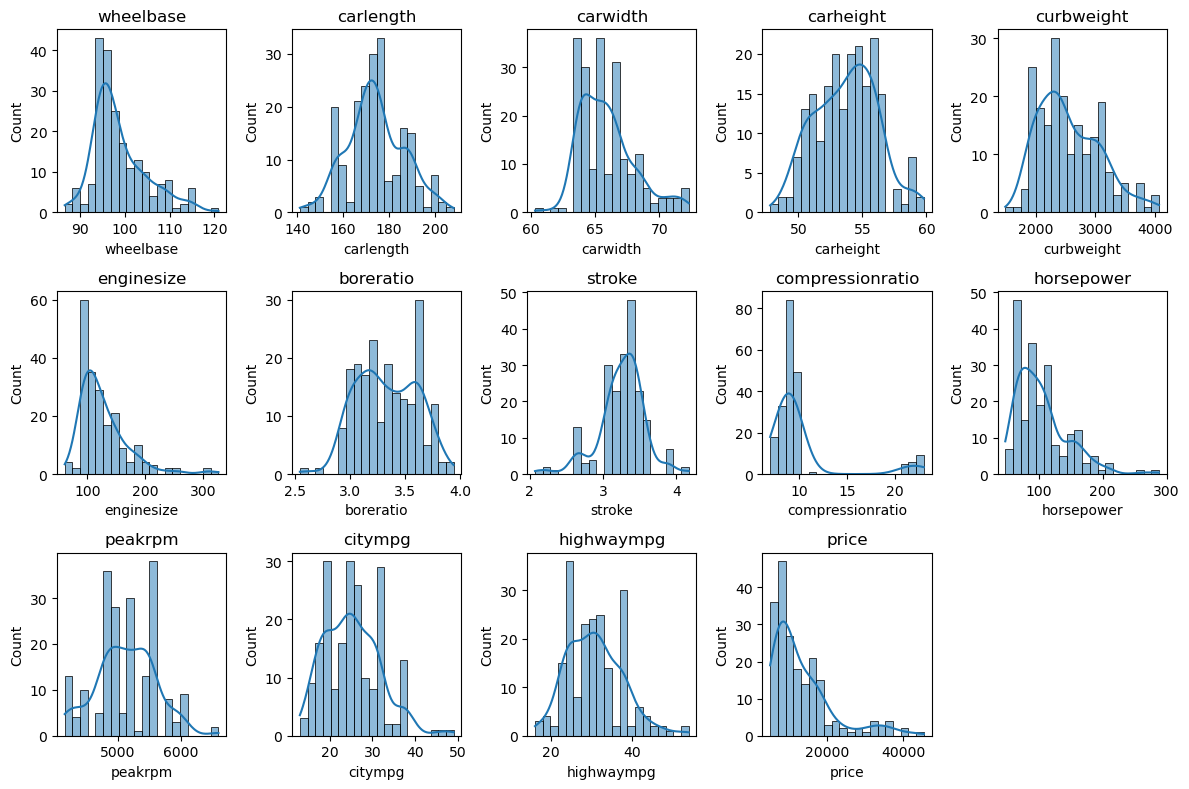

In [10]:
# Распределение числовых признаков
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

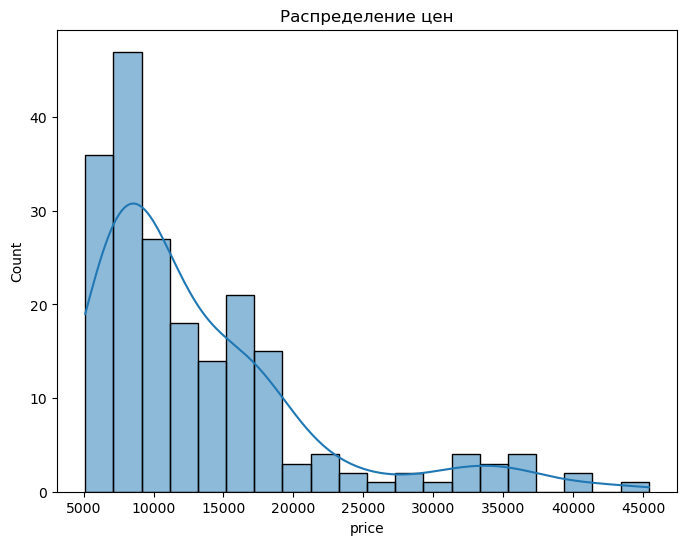

In [11]:
# Анализ цены
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Распределение цен')
plt.show()

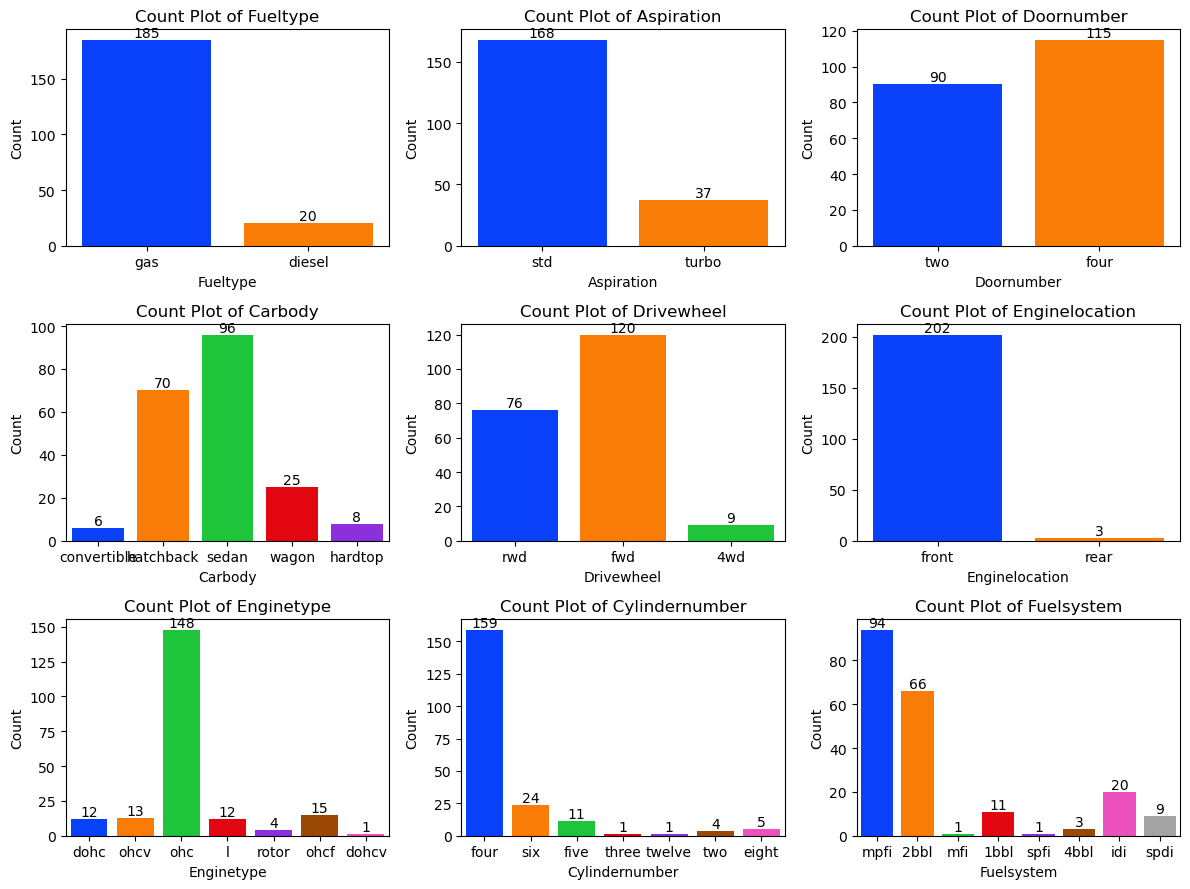

In [12]:
# Определение списка категориальных столбцов для анализа
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Создание подграфиков
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Для сглаживания двумерного массива

# Перебор каждого категориального столбца
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Регулировка отступов и демонстрация графиков
plt.tight_layout()
plt.show()

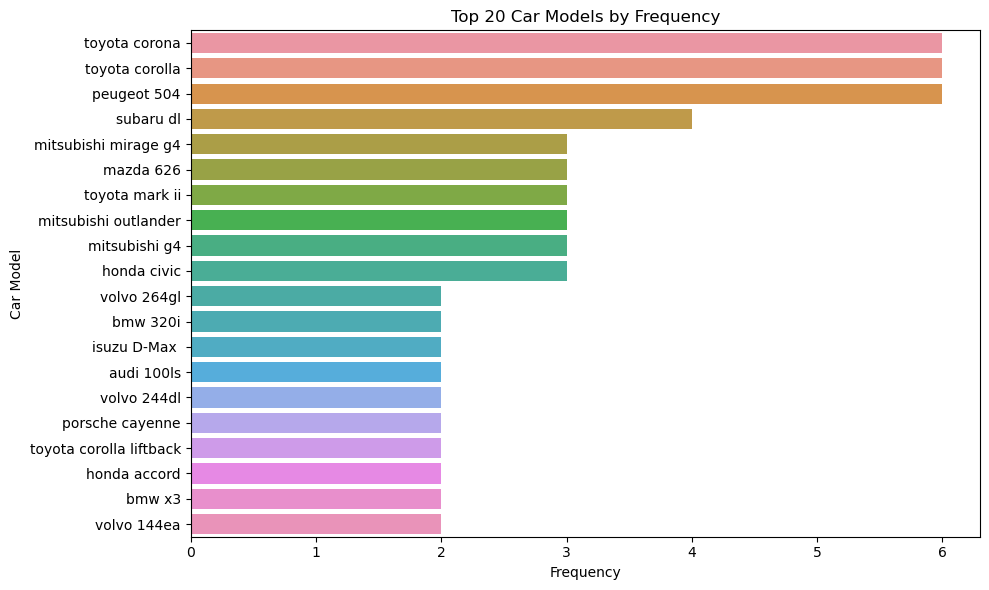

In [16]:
n = 20  # Количество самых популярных моделей автомобилей для построения графика
top_car_models = df['CarName'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

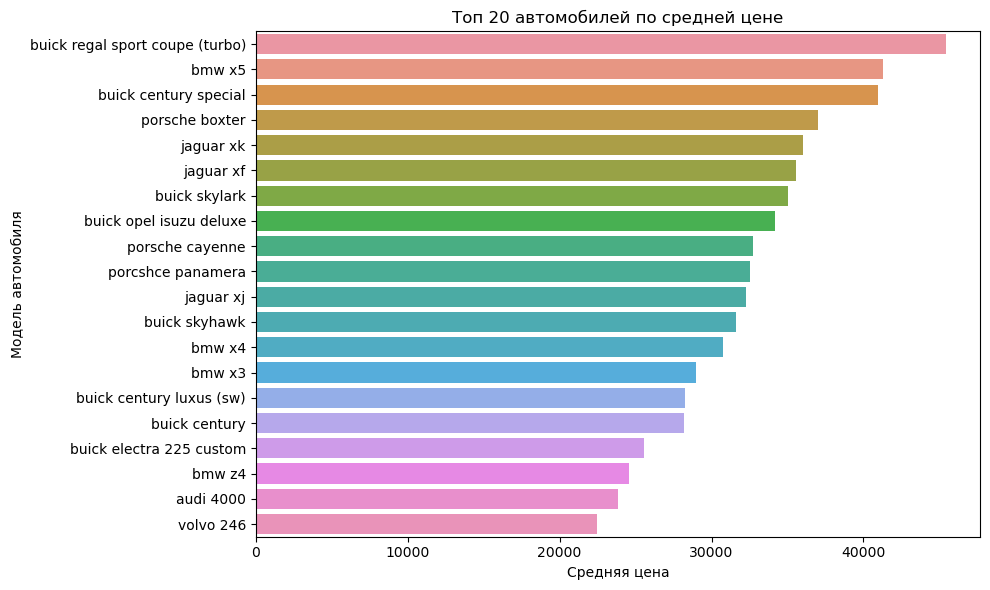

In [37]:
# Расчёт средней цены для каждой модели автомобиля
avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Строим график топ N автомобилей по средней цене
n = 20  # Число топ N автомобилей
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Топ {n} автомобилей по средней цене')
plt.xlabel('Средняя цена')
plt.ylabel('Модель автомобиля')
plt.tight_layout()
plt.show()

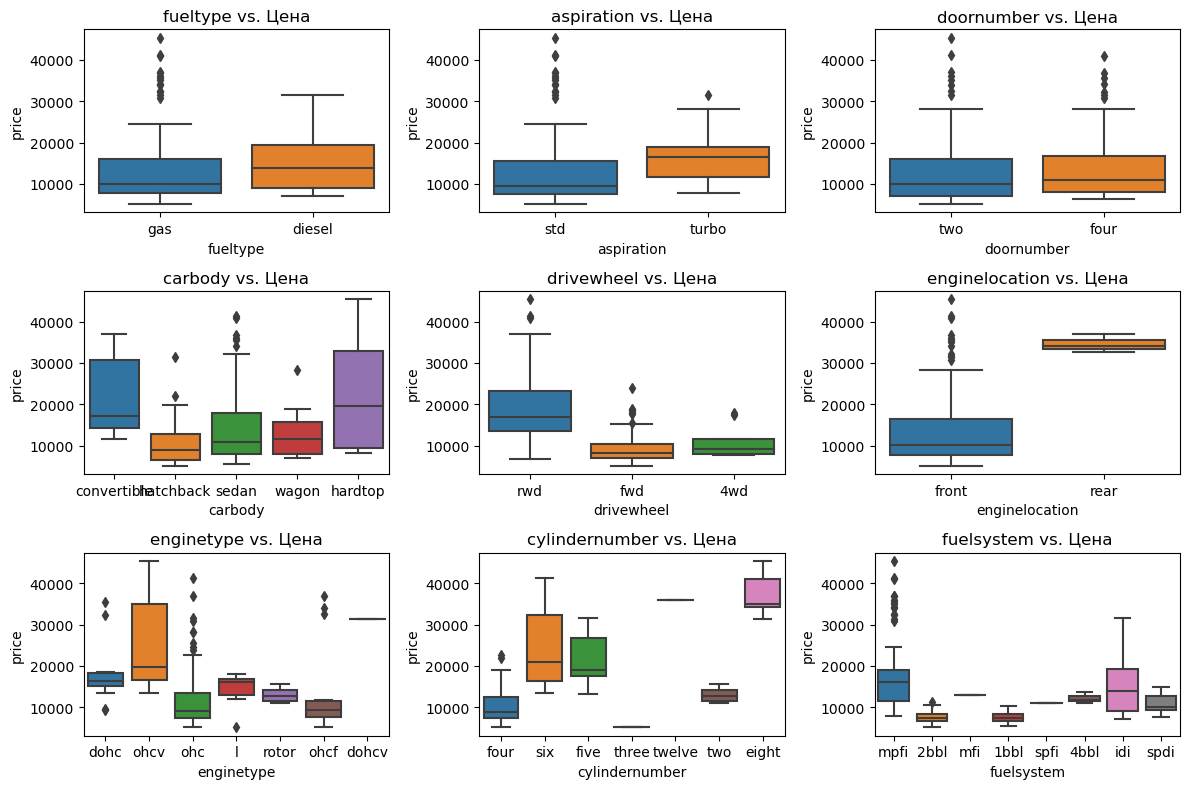

In [39]:
# Категориальные переменные vs. Цена
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Цена')
plt.tight_layout()
plt.show()

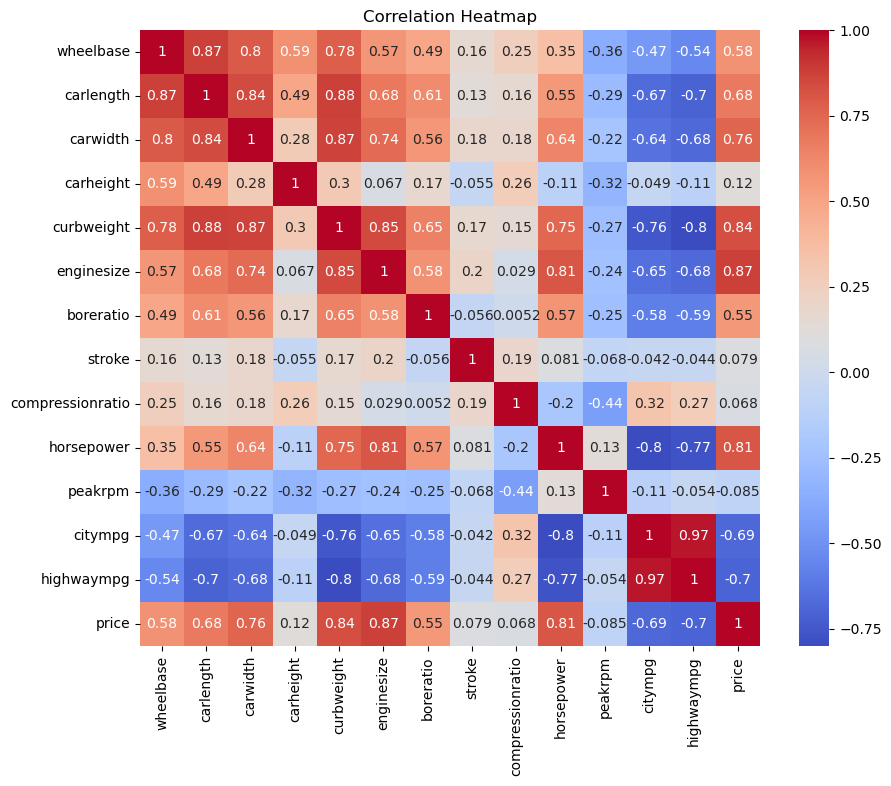

In [40]:
# Анализ корреляции
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 5. Предварительная обработка данных

In [42]:
# Извлечение марки и модели из CarName
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Определение категориальных и числовых столбцов
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

# Кодирование категориальных переменных
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Feature engineering
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2
df['log_enginesize'] = np.log(df['enginesize'] + 1)

# Масштабирование числовых признаков
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

## 6. Обучение модели и оценка её метрик качества

In [49]:
# Разбиваем выборку на тренировочную и тестовую
X = df.drop(['price', 'CarName'], axis=1)  # Include the engineered features and CarName
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

In [50]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8615670883470106
Mean Squared Error: 10928450.667965405


In [51]:
pred_df = pd.DataFrame({'Истинное значение':y_test,'Предсказанное значение':y_pred,'Рассогласование':y_test-y_pred})
pred_df

,Истинное значение,Предсказанное значение,Рассогласование
15,30760.000,24644.498954,6115.501046
9,17859.167,19770.234284,-1911.067284
100,9549.000,8323.732428,1225.267572
132,11850.000,13885.801568,-2035.801568
68,28248.000,26718.615842,1529.384158
95,7799.000,7079.308256,719.691744
159,7788.000,10106.850945,-2318.850945
162,9258.000,6570.571027,2687.428973
147,10198.000,10418.264321,-220.264321
182,7775.000,10904.998471,-3129.998471
